# Dependencies

In [41]:
%pip install numpy
%pip install pandas
%pip install scikit-learn
%pip install matplotlib


[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [18]:
# imports
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score, f1_score

# Load data

In [24]:
loan_data = pd.read_csv('loan_data.csv')

# Exploratory data analysis

In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [6]:
loan_data.describe()

,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,loan_status
count,45000.000000,4.500000e+04,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000,45000.000000
mean,27.764178,8.031905e+04,5.410333,9583.157556,11.006606,0.139725,5.867489,632.608756,0.222222
std,6.045108,8.042250e+04,6.063532,6314.886691,2.978808,0.087212,3.879702,50.435865,0.415744
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000,0.000000
25%,24.000000,4.720400e+04,1.000000,5000.000000,8.590000,0.070000,3.000000,601.000000,0.000000
50%,26.000000,6.704800e+04,4.000000,8000.000000,11.010000,0.120000,4.000000,640.000000,0.000000
75%,30.000000,9.578925e+04,8.000000,12237.250000,12.990000,0.190000,8.000000,670.000000,0.000000
max,144.000000,7.200766e+06,125.000000,35000.000000,20.000000,0.660000,30.000000,850.000000,1.000000


In [46]:
loan_data.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


# Pre procsesing

In [25]:
# Numeric
loan_data['person_age'] = loan_data['person_age'].astype(int)
loan_data['person_gender'] = loan_data['person_gender'].map({'male': 0, 'female': 1})
# print(loan_data['cb_person_cred_hist_length'].unique())
loan_data['cb_person_cred_hist_length'] = loan_data['cb_person_cred_hist_length'].astype(int)

loan_data['loan_percent_income'] = (loan_data['loan_percent_income'] * 100).astype(int)


In [26]:
# Ordinal
# print(loan_data['person_education'].unique())
loan_data['person_education'] = loan_data['person_education'].map({'High School': 0, 'Associate':1,'Bachelor': 2, 'Master': 3,'Doctorate': 4})

In [27]:
# Nominal
print(loan_data['person_home_ownership'].unique())
print(loan_data['loan_intent'].unique())

['RENT' 'OWN' 'MORTGAGE' 'OTHER']
['PERSONAL' 'EDUCATION' 'MEDICAL' 'VENTURE' 'HOMEIMPROVEMENT'
 'DEBTCONSOLIDATION']


In [28]:
# Binary variables
# print(loan_data['loan_status'].unique())
loan_data['loan_status'] = loan_data['loan_status'].astype(bool)
loan_data['previous_loan_defaults_on_file'] = loan_data['previous_loan_defaults_on_file'].map({'Yes': True, 'No': False})

In [29]:
# Binning


In [30]:
# print(loan_data['loan_status'][loan_data['loan_status'] == 1].count())


In [31]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  int64  
 1   person_gender                   45000 non-null  int64  
 2   person_education                45000 non-null  int64  
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  int64  
 10  cb_person_cred_hist_length      45000 non-null  int64  
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

In [32]:
df = pd.get_dummies(loan_data, columns=["person_home_ownership", "loan_intent"], drop_first=True)

X = df.drop(columns=["loan_status"])
y = df["loan_status"].astype(int)

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=33)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# Pipeline - Feed forward Neural Network 

In [34]:
mlp = MLPClassifier(hidden_layer_sizes=(32, 16,16,16,8,8,8,8), activation='relu', solver='adam', 
                    max_iter=2000, random_state=33)
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(32, 16, 16, 16, 8, 8, 8, 8), max_iter=2000,
              random_state=33)

## Validation - Feed forward Neural Network 

In [41]:
nn_y_test_pred = mlp.predict(X_test)
nn_y_train_pred = mlp.predict(X_train)

accuracy = accuracy_score(y_test, nn_y_test_pred)
f1 = f1_score(y_test, nn_y_test_pred, average='weighted')

print(f"Test Accuracy: {accuracy:.4f}")
print(f"Test F1: {f1:.4f}")

Test Accuracy: 0.9140
Test F1: 0.9120


# Pipeline - Classification DT

In [36]:
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, nn_y_train_pred)

DecisionTreeClassifier(max_depth=4, random_state=42)

## Validation - Classification DT

In [42]:
dt_y_train_pred = tree.predict(X_train)
dt_y_test_pred = tree.predict(X_test)

train_mimic_accuracy = accuracy_score(nn_y_train_pred, dt_y_train_pred)
test_mimic_accuracy = accuracy_score(nn_y_test_pred, dt_y_test_pred)
train_mimic_f1 = f1_score(nn_y_train_pred, dt_y_train_pred, average='weighted')
test_mimic_f1 = f1_score(nn_y_test_pred, dt_y_test_pred, average='weighted')

print(f"Surrogate Train Mimic Accuracy: {train_mimic_accuracy:.4f}")
print(f"Surrogate Test Mimic Accuracy: {test_mimic_accuracy:.4f}")
print(f"Surrogate Train Mimic F1: {train_mimic_f1:.4f}")
print(f"Surrogate Test Mimic F1: {test_mimic_f1:.4f}")

Surrogate Train Mimic Accuracy: 0.9418
Surrogate Test Mimic Accuracy: 0.9372
Surrogate Train Mimic F1: 0.9417
Surrogate Test Mimic F1: 0.9371


In [44]:
test_ground_truth_accuracy = accuracy_score(y_test, dt_y_test_pred)
test_ground_truth_f1 = f1_score(y_test, dt_y_test_pred, average='weighted')

print(f"Surrogate Test Ground Truth Accuracy: {test_ground_truth_accuracy:.4f}")
print(f"Surrogate Test Ground Truth F1: {test_ground_truth_f1:.4f}")

Surrogate Test Ground Truth Accuracy: 0.9099
Surrogate Test Ground Truth F1: 0.9076


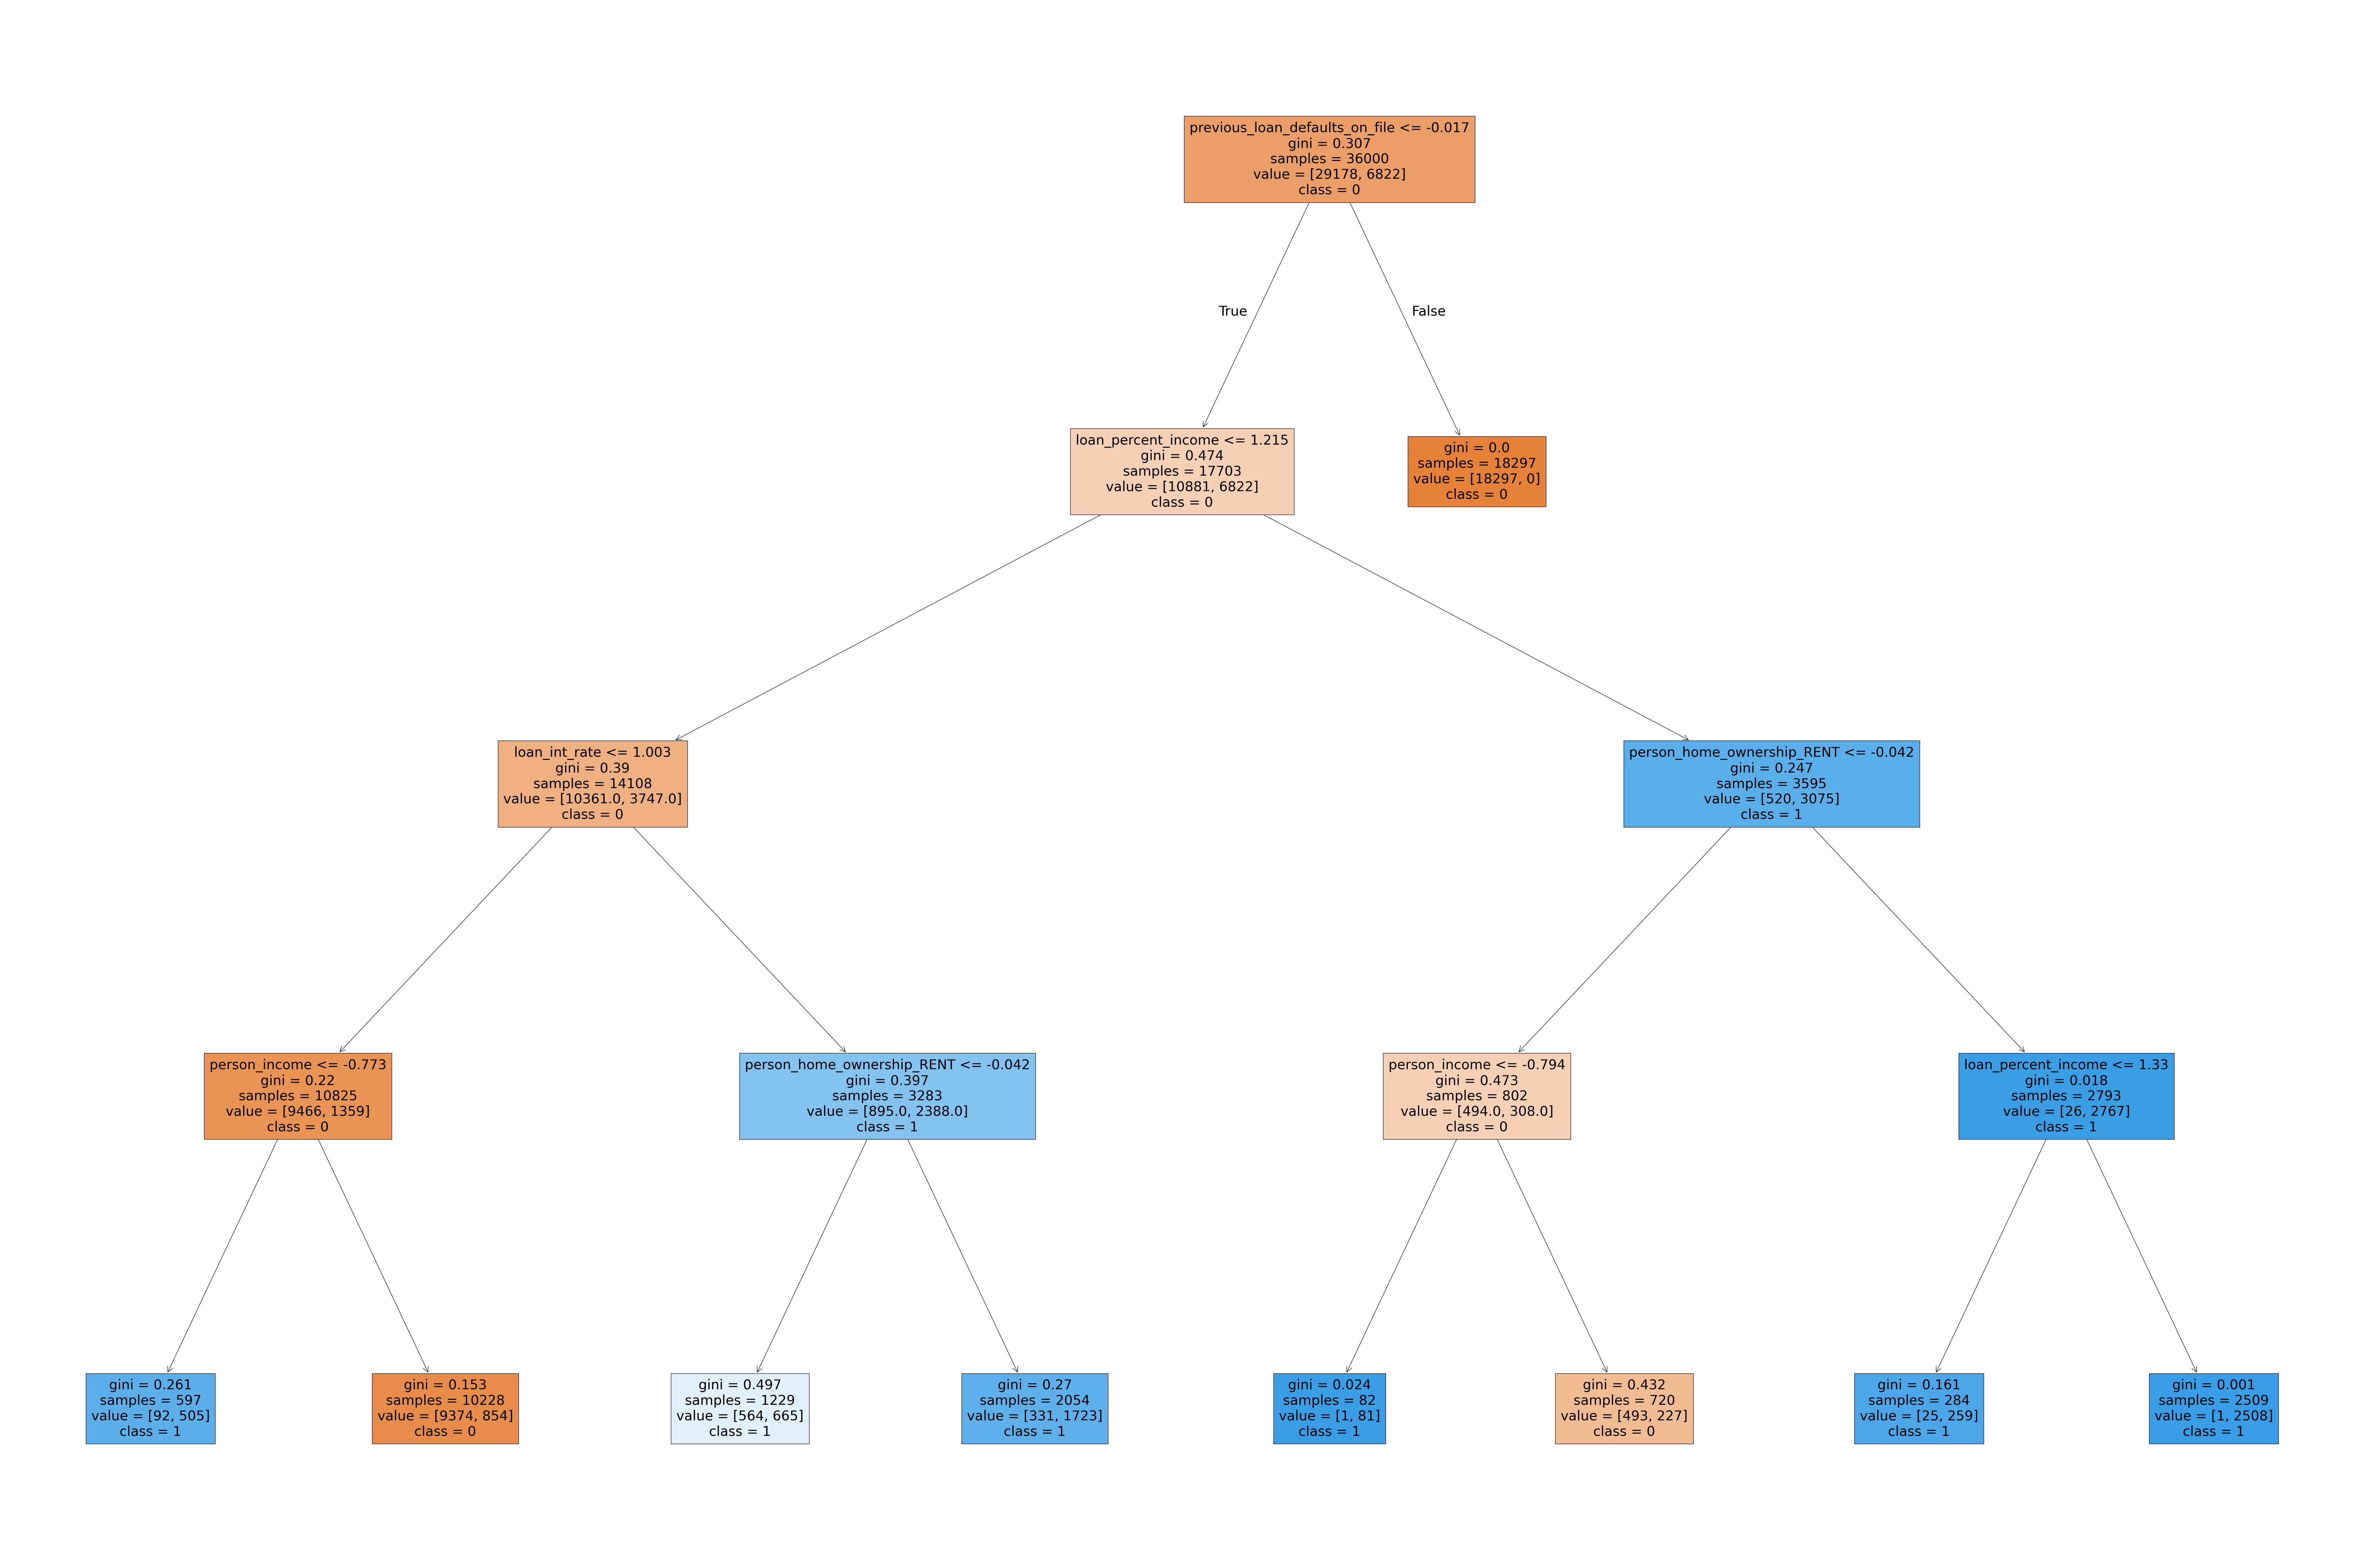

In [39]:
plt.figure(figsize=(96, 64))  
plot_tree(tree, filled=True, feature_names=X.columns.tolist(), class_names=[str(cls) for cls in tree.classes_])
plt.show()

In [40]:
start = time.perf_counter()
nn_y_test_pred = mlp.predict(X_test)
end = time.perf_counter()
print(f"MLP Test Inference Time: {end - start:.6f} seconds")

# Measure inference time for MLP on train set
start = time.perf_counter()
nn_y_train_pred = mlp.predict(X_train)
end = time.perf_counter()
print(f"MLP Train Inference Time: {end - start:.6f} seconds")

# Measure inference time for Decision Tree on train set
start = time.perf_counter()
dt_y_train_pred = tree.predict(X_train)
end = time.perf_counter()
print(f"Decision Tree Train Inference Time: {end - start:.6f} seconds")

# Measure inference time for Decision Tree on test set
start = time.perf_counter()
dt_y_test_pred = tree.predict(X_test)
end = time.perf_counter()
print(f"Decision Tree Test Inference Time: {end - start:.6f} seconds")

MLP Test Inference Time: 0.079985 seconds
MLP Train Inference Time: 0.060005 seconds
Decision Tree Train Inference Time: 0.002157 seconds
Decision Tree Test Inference Time: 0.000699 seconds
